In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats

In [2]:
df = pd.read_csv("../../데이터수집/data/htest04.csv")
df

,group,height
0,A,175
1,A,180
2,A,172
3,A,182
4,A,185
5,A,171
6,A,161
7,A,179
8,A,168
9,B,174


In [15]:
df['group'].value_counts()
df['group'].unique()

array(['A', 'B', 'C'], dtype=object)

In [13]:
A = df[df['group']=='A']['height'].values
B = df[df['group']=='B']['height'].values
C = df[df['group']=='C']['height'].values
A,B,C

(array([175, 180, 172, 182, 185, 171, 161, 179, 168], dtype=int64),
 array([174, 171, 182, 183, 189, 178, 179, 185, 188, 181], dtype=int64),
 array([171, 168, 166, 158, 171, 162, 161, 160, 167, 165], dtype=int64))

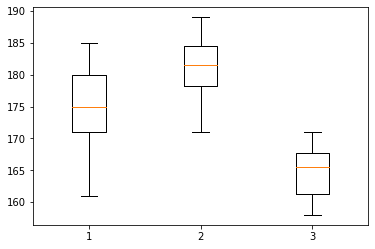

In [17]:
import matplotlib.pyplot as plt
plt.boxplot([A,B,C])
plt.show()

In [20]:
# 정규성 검정 
# kstest : 콜모고로프-스미르노프 검정
print(sp.stats.kstest(A, 'norm'))
print(sp.stats.kstest(B, 'norm'))
print(sp.stats.kstest(C, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [21]:
# 일원분산검정
sp.stats.f_oneway(A, B, C) # 대립가설 채택 (세 그룹의 평균은 유의미한 차이가 있다.)

F_onewayResult(statistic=18.20204645258331, pvalue=1.1399440916100489e-05)

In [29]:
# 사후검정
group = []
group.extend(['A']*len(A))
group.extend(['B']*len(B))
group.extend(['C']*len(C))

data = []
data.extend(A.tolist())
data.extend(B.tolist())
data.extend(C.tolist())
data

[175,
 180,
 172,
 182,
 185,
 171,
 161,
 179,
 168,
 174,
 171,
 182,
 183,
 189,
 178,
 179,
 185,
 188,
 181,
 171,
 168,
 166,
 158,
 171,
 162,
 161,
 160,
 167,
 165]

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(data, group))
# A-B 는 차이 없음
# A-C, B-C는 차이 있음 8


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   6.2222 0.0812  -0.6444 13.0889  False
     A      C  -9.8778 0.0039 -16.7444 -3.0111   True
     B      C    -16.1    0.0 -22.7835 -9.4165   True
-----------------------------------------------------


In [33]:
# 지점별_일별판매량.csv
df = pd.read_csv("../../데이터수집/data/지점별_일별판매량.csv", encoding='ms949')
df

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222
5,6,149,140,238
6,7,140,146,218
7,8,142,122,200
8,9,124,160,186
9,10,166,157,188


In [34]:
A = df['지점A'].values
B = df['지점B'].values
C = df['지점C'].values
A,B,C

(array([124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139,
        121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127,
        140, 138, 128, 117], dtype=int64),
 array([118, 141, 130, 127, 107, 140, 146, 122, 160, 157, 141, 142, 150,
        136, 157, 107, 172, 126, 135, 115, 133, 132, 127, 128, 142, 161,
        140, 125, 142, 135], dtype=int64),
 array([216, 214, 212, 179, 222, 238, 218, 200, 186, 188, 216, 183, 198,
        199, 187, 183, 190, 161, 203, 192, 235, 208, 187, 201, 196, 202,
        209, 179, 197, 204], dtype=int64))

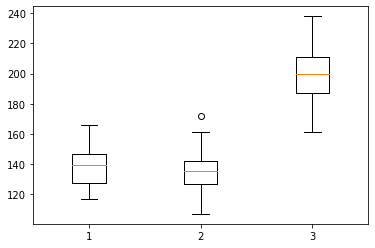

In [35]:
plt.boxplot([A,B,C])
plt.show()

In [36]:
sp.stats.f_oneway(A, B, C)

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)

In [37]:
# 사후검정
group = []
group.extend(['A']*len(A))
group.extend(['B']*len(B))
group.extend(['C']*len(C))

data = []
data.extend(A.tolist())
data.extend(B.tolist())
data.extend(C.tolist())
print(pairwise_tukeyhsd(data, group))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -1.4 0.9297 -10.5741  7.7741  False
     A      C  62.2333    0.0  53.0592 71.4075   True
     B      C  63.6333    0.0  54.4592 72.8075   True
-----------------------------------------------------
